<a href="https://colab.research.google.com/github/SARA3SAEED/ML-Mu/blob/main/s05f_supervised_classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning | Classification (Logistic Regression)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# %matplotlib inline

==========

## Logistic Regression | Intuition (Admittance)

Scikit-Learn Logistic Regression Module: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Creating & Inspecting Dataset

In [6]:
admit = pd.read_csv('/content/drive/MyDrive/ML-Mu/supervised-classification/datasets/admittance.csv')

In [7]:
admit.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [8]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [9]:
admit.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SAT,168.0,1695.27,183.02,1334.0,1547.5,1691.5,1844.5,2050.0


### Splitting & Preprocessing Data

In [10]:
admit['Admitted'] = pd.get_dummies(admit['Admitted'], drop_first=True).rename(columns={'Yes':'Admitted'})

In [11]:
admit

,SAT,Admitted
0,1363,False
1,1792,True
2,1954,True
3,1653,False
4,1593,False
...,...,...
163,1722,True
164,1750,True
165,1555,False
166,1524,False


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
admit['SAT'] = StandardScaler().fit_transform(admit[['SAT']]).round(2)

In [14]:
admit

,SAT,Admitted
0,-1.82,False
1,0.53,True
2,1.42,True
3,-0.23,False
4,-0.56,False
...,...,...
163,0.15,True
164,0.30,True
165,-0.77,False
166,-0.94,False


In [15]:
X = admit[['SAT']]
y = admit['Admitted']

In [16]:
X

,SAT
0,-1.82
1,0.53
2,1.42
3,-0.23
4,-0.56
...,...
163,0.15
164,0.30
165,-0.77
166,-0.94


In [17]:
y

0      False
1       True
2       True
3      False
4      False
       ...  
163     True
164     True
165    False
166    False
167    False
Name: Admitted, Length: 168, dtype: bool

### Data Exploration

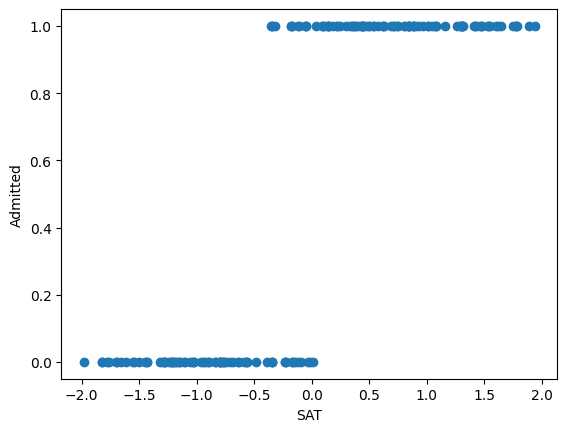

In [18]:
# sns.regplot(data=admit,x=X,y=y)
plt.scatter(X,y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

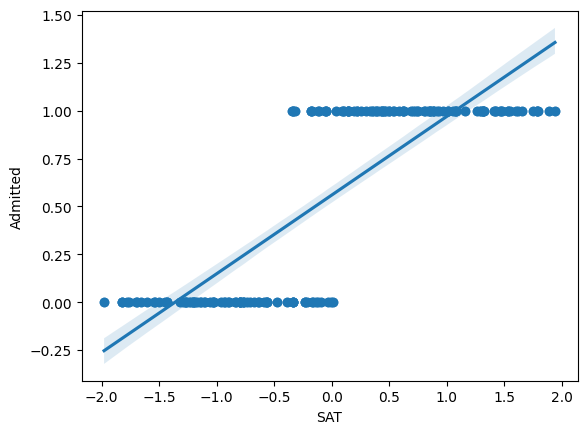

In [19]:
sns.regplot(data=admit,x=X,y=y)
plt.scatter(X,y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

### Model Training & Predicting

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X,y)

LogisticRegression()

In [23]:
model.coef_

array([[3.86141574]])

In [24]:
model.intercept_

array([0.72285595])

In [25]:
# y = b0 + b1 * x

##### Predicting New Instance

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
model.predict(StandardScaler().fit_transform([[1650]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

##### Plotting Logistic Model

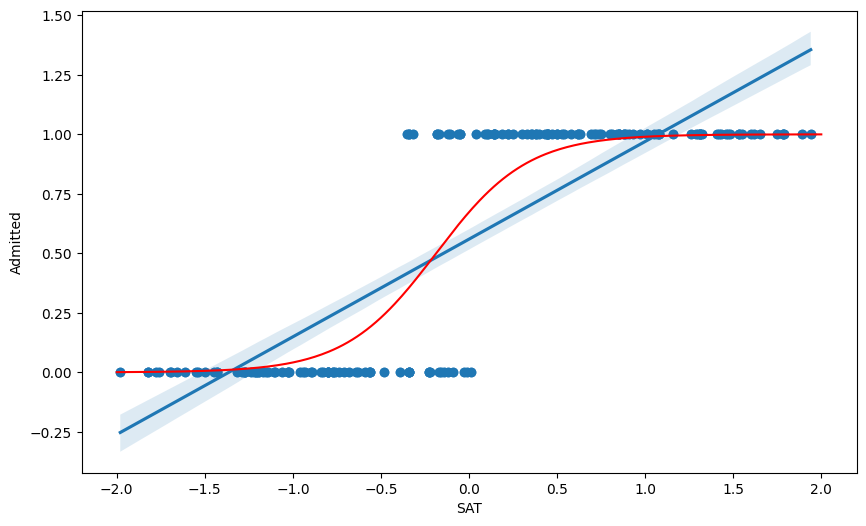

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(data=admit,x=X,y=y)
plt.scatter(X, y)
X_test = np.linspace(-2, 2, 300)
from scipy.special import expit
loss = expit(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, loss, color="red")

==========

## Logistic Regression | Full Case-study (Facebook Ads)

### Importing Dataset & Extracting Features

In [34]:
import pandas as pd
fb_ads = pd.read_csv("/content/drive/MyDrive/ML-Mu/supervised-classification/datasets/facebook_ads.csv", encoding='latin-1')
fb_ads

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [36]:
clicked = fb_ads[fb_ads['Clicked']==1]
clicked

,Names,emails,Country,Time Spent on Site,Salary,Clicked
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
...,...,...,...,...,...,...
486,Cheryl,iaculis.enim@nislelementum.edu,Indonesia,41.544304,55792.69851,1
487,Courtney,porttitor.tellus@elitelit.org,Malaysia,43.281586,54123.64650,1
490,Jonah,augue@risusNuncac.co.uk,Myanmar,34.828303,50151.32622,1
491,Merrill,dolor.sit@turpisIn.com,Egypt,37.173216,63750.41558,1


In [37]:
not_clicked = fb_ads[fb_ads['Clicked']==0]
not_clicked

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0
...,...,...,...,...,...,...
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,24.615228,34721.74862,0
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0


In [38]:
print("Total =", len(fb_ads))

print("Number of customers who clicked on Ad =", len(clicked))
print("Percentage Clicked =", 1.*len(clicked)/len(fb_ads)*100.0, "%")

print("Did not Click =", len(not_clicked))
print("Percentage who did not Click =", 1.*len(not_clicked)/len(fb_ads)*100.0, "%")

Total = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


### Data Exploration

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

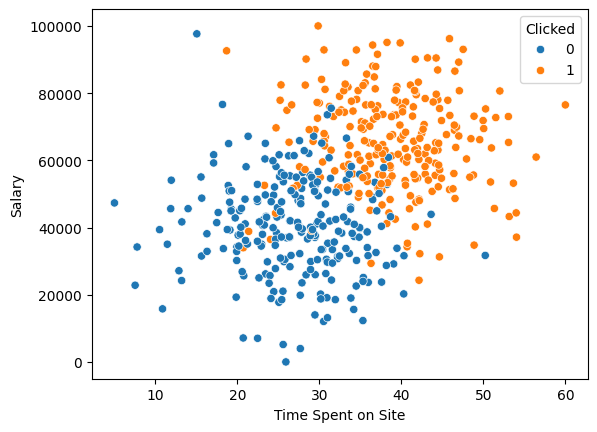

In [39]:
sns.scatterplot(data=fb_ads, x=fb_ads['Time Spent on Site'], y=fb_ads['Salary'], hue = fb_ads['Clicked'])

### Data Splitting & Preprocessing

In [40]:
fb_ads

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [41]:
fb_ads.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [42]:
X = fb_ads.drop('Clicked',axis=1).values
y = fb_ads['Clicked'].values

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Training & Predicting

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression()

In [48]:
clf.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation & Prediction

In [49]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [50]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

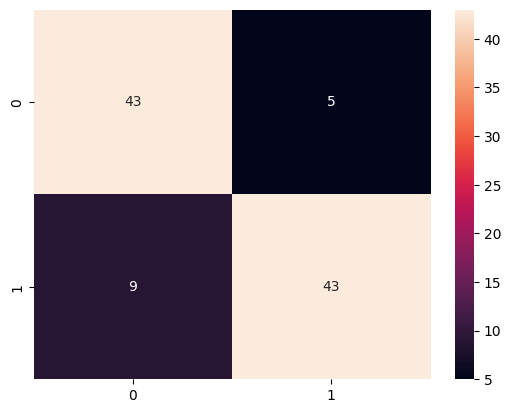

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

<ipython-input-53-217b23a6bb46>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


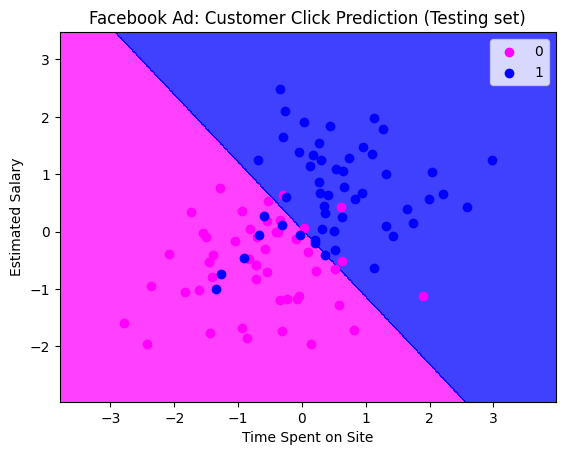

In [53]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

==========

# THANK YOU!